In [2]:
# Install sklearn
!pip install scikit-learn==1.5.2

# Install TabPFN
!pip install tabpfn

# TabPFN Extensions installs optional functionalities around the TabPFN model
# These include post-hoc ensembles, interpretability tools, and more
!git clone https://github.com/PriorLabs/tabpfn-extensions
!pip install -e tabpfn-extensions


# Install Baselines
!pip install catboost xgboost

# Install example datasets
!pip install datasets


  Obtaining dependency information for scikit-learn==1.5.2 from https://files.pythonhosted.org/packages/45/05/74e453853c0b1b0773f46027848a17467f5dc9c5f15d096d911163d27550/scikit_learn-1.5.2-cp39-cp39-win_amd64.whl.metadata
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.2/11.0 MB 7.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/11.0 MB 9.3 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/11.0 MB 8.3 MB/s eta 0:00:02
   ----- ---------------------------------- 1.5/11.0 MB 8.7 MB/s eta 0:00:02
   ------ --------------------------------- 1.9/11.0 MB 8.5 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/11.0 MB 8.2 MB/s eta 0:00:02
   ---------- ----------------------------- 2.8/11.0 MB 8.8 MB/s eta 0:00:01
   ----------- ---------------------------- 3.3/11.0 MB 8.8 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/11.0 MB 9.6 MB/s eta 0:00:01
   -----------


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
fatal: destination path 'tabpfn-extensions' already exists and is not an empty directory.


Obtaining file:///C:/Users/u0148775/PycharmProjects/CreditScoring/tabpfn-extensions
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for tabpfn-extensions (pyproject.toml): started
  Building editable for tabpfn-extensions (pyproject.toml): finished with status 'done'
  Created wheel for tabpfn-extensions: filename=tabpfn_extensions-0.0.4-0.editable-py3-none-any.whl size=7807 sha256=872a8d53847819b73fbb635fafea0e265d0ca6980454659eeb60c399921539f6
  Stored in directory: C:\Users\u0148775\AppData\Local\Temp\pip-ephem-wheel-cache-


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import os

# Setup Imports
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer, load_diabetes, load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, Markdown, Latex

# Baseline Imports
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from catboost import CatBoostClassifier, CatBoostRegressor

import torch

from tabpfn import TabPFNClassifier, TabPFNRegressor

if not torch.cuda.is_available():
    raise SystemError('GPU device not found. For fast training, please enable GPU. See section above for instructions.')

SystemError: GPU device not found. For fast training, please enable GPU. See section above for instructions.

In [4]:
df = load_breast_cancer(as_frame=True)

# Parkinson's Disease dataset: Predict Parkinson's disease presence
# Features: Voice measurements (e.g., frequency, amplitude)
# Samples: 195 cases
#df = fetch_openml('parkinsons')

# Alternative datasets (commented for reference):

# German Credit Fraud (ID: 31)
# Samples: 1,000
# Features: 20 (account info, credit history, employment)
# Target: Good/Bad credit risk
# df = fetch_openml(data_id=31)

# Cholesterol dataset: Predict cholesterol levels
# Features: Patient characteristics, medical measurements
# Samples: 303 patients
# Target: Cholesterol levels in mg/dl
# df = fetch_openml('cholesterol', version=2, as_frame=True)

# Primary Tumor dataset: Predict tumor type and size
# Features: Patient symptoms, medical test results
# Samples: 339 patients
# Target: Tumor classification and size
# df = fetch_openml('primary-tumor', version=1, as_frame=True) - too many classes!

# Heart Disease dataset (Statlog): Predict presence of heart disease
# Features: Clinical and test measurements
# Samples: 270 patients
# Target: Binary heart disease diagnosis
# df = fetch_openml("heart-statlog", version=1)

# Diabetes dataset: Predict diabetes presence
# Features: Medical measurements, patient history
# Samples: 768 patients
# Target: Binary diabetes diagnosis
#df = fetch_openml("diabetes", version=1)

# Hypothyroid dataset: Predict thyroid condition
# Features: Blood test results, patient symptoms
# Samples: 3772 patients
# Target: Thyroid condition classification
# df = fetch_openml('hypothyroid')

X, y = df.data, df.target

# Encode target labels to classes
le = LabelEncoder()
y = le.fit_transform(y)

# Convert all categorical columns to numeric
for col in X.select_dtypes(['category']).columns:
    X[col] = X[col].cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Print dataset description
display(Markdown(df['DESCR']))

display(X)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - class:
            - WDBC-Malignant
            - WDBC-Benign

:Summary Statistics:

===================================== ====== ======
                                        Min    Max
===================================== ====== ======
radius (mean):                        6.981  28.11
texture (mean):                       9.71   39.28
perimeter (mean):                     43.79  188.5
area (mean):                          143.5  2501.0
smoothness (mean):                    0.053  0.163
compactness (mean):                   0.019  0.345
concavity (mean):                     0.0    0.427
concave points (mean):                0.0    0.201
symmetry (mean):                      0.106  0.304
fractal dimension (mean):             0.05   0.097
radius (standard error):              0.112  2.873
texture (standard error):             0.36   4.885
perimeter (standard error):           0.757  21.98
area (standard error):                6.802  542.2
smoothness (standard error):          0.002  0.031
compactness (standard error):         0.002  0.135
concavity (standard error):           0.0    0.396
concave points (standard error):      0.0    0.053
symmetry (standard error):            0.008  0.079
fractal dimension (standard error):   0.001  0.03
radius (worst):                       7.93   36.04
texture (worst):                      12.02  49.54
perimeter (worst):                    50.41  251.2
area (worst):                         185.2  4254.0
smoothness (worst):                   0.071  0.223
compactness (worst):                  0.027  1.058
concavity (worst):                    0.0    1.252
concave points (worst):               0.0    0.291
symmetry (worst):                     0.156  0.664
fractal dimension (worst):            0.055  0.208
===================================== ====== ======

:Missing Attribute Values: None

:Class Distribution: 212 - Malignant, 357 - Benign

:Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

:Donor: Nick Street

:Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. dropdown:: References

  - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction
    for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on
    Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
    San Jose, CA, 1993.
  - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and
    prognosis via linear programming. Operations Research, 43(4), pages 570-577,
    July-August 1995.
  - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
    to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994)
    163-171.


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=6)

# Train and evaluate TabPFN
y_pred = TabPFNClassifier(random_state=42).fit(X_train, y_train).predict_proba(X_test)

# Calculate ROC AUC (handles both binary and multiclass)
score = roc_auc_score(y_test, y_pred if len(np.unique(y)) > 2 else y_pred[:, 1])
print(f"TabPFN ROC AUC: {score:.4f}")

C:\Users\u0148775\PycharmProjects\CreditScoring\venv\lib\site-packages\tabpfn\base.py:88: UserWarning: Downloading model to C:\Users\u0148775\AppData\Roaming\tabpfn\tabpfn-v2-classifier.ckpt.
  model, _, config_ = load_model_criterion_config(


tabpfn-v2-classifier.ckpt:   0%|          | 0.00/29.0M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

TabPFN ROC AUC: 0.9985


Text(0.5, 1.0, 'Model Comparison - 5-fold Cross-validation')

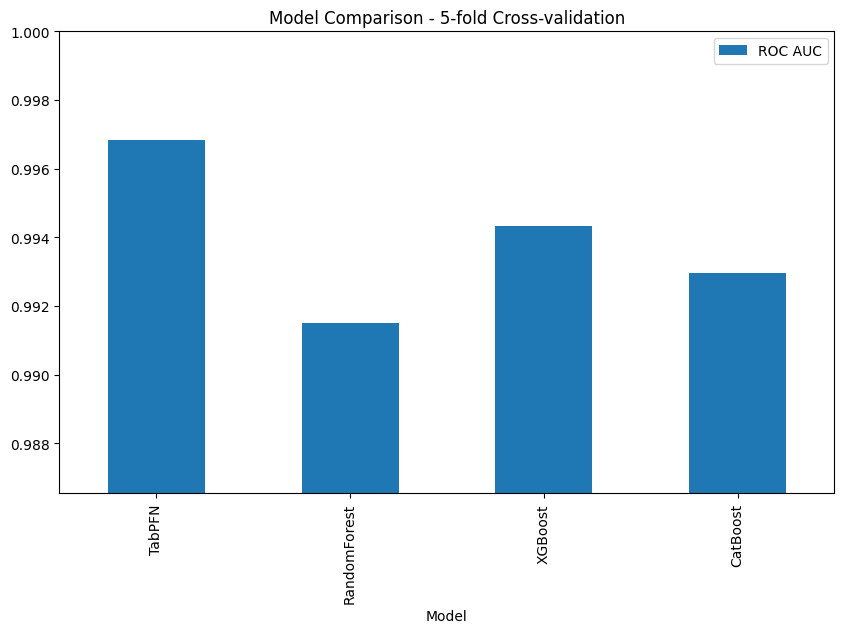

In [6]:
# Compare different machine learning models by training each one multiple times
# on different parts of the data and averaging their performance scores for a
# more reliable performance estimate

# Define models
models = [
    ('TabPFN', TabPFNClassifier(random_state=42)),
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0))
]

# Calculate scores
scoring = 'roc_auc_ovr' if len(np.unique(y)) > 2 else 'roc_auc'
scores = {name: cross_val_score(model, X, y, cv=5, scoring=scoring, n_jobs=1, verbose=1).mean()
          for name, model in models}

# Plot results
df = pd.DataFrame(list(scores.items()), columns=['Model', 'ROC AUC'])
ax = df.plot(x='Model', y='ROC AUC', kind='bar', figsize=(10, 6))
ax.set_ylim(df['ROC AUC'].min() * 0.995, min(1.0, df['ROC AUC'].max() * 1.005))
ax.set_title('Model Comparison - 5-fold Cross-validation')

In [7]:
from tabpfn_extensions.post_hoc_ensembles.sklearn_interface import AutoTabPFNClassifier

# Binary
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)
clf = AutoTabPFNClassifier(max_time=30) # runs for 30 seconds, longer ensembling time leads to better results
clf.fit(X_train, y_train)
prediction_probabilities = clf.predict_proba(X_test)
predictions = np.argmax(prediction_probabilities, axis=-1)

print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))
print("Accuracy", accuracy_score(y_test, predictions))

ModuleNotFoundError: No module named 'tabpfn_extensions'

In [ ]:
# Boston Housing dataset
# Regression task: Predict house prices
# Features: Neighborhood characteristics, housing attributes
# Samples: 506 neighborhoods
# Target: Median house value in $1000s
df = fetch_openml(data_id=531, as_frame=True)

# Alternative datasets (commented for reference):

# Liver Disorders dataset
# Classification task: Predict liver disorder presence
# Features: Blood test results, alcohol consumption
# Samples: 345 patients
# Target: Binary liver disorder diagnosis
# df = fetch_openml("liver-disorders", version=1)

# Grid Stability dataset
# Regression task: Predict electrical grid stability
# Features: Power system measurements, grid parameters
# Samples: 10,000 simulations
# Target: Grid stability score
#df = fetch_openml(data_id=44973, as_frame=True)

# Concrete Compressive Strength dataset
# Regression task: Predict concrete strength
# Features: Concrete components (cement, water, aggregates)
# Samples: 1,030 concrete samples
# Target: Compressive strength in MPa
#df = fetch_openml(data_id=44959, as_frame=True)

X, y = df.data, df.target

# Convert all 'object' and 'category' columns to numeric
for col in X.select_dtypes(['object', 'category']).columns:
    X[col] = pd.factorize(X[col])[0]  # Factorize encodes as integers

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Print dataset description
display(Markdown(df['DESCR']))

display(X)

In [ ]:
# Train and evaluate TabPFN
reg = TabPFNRegressor(random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Calculate Variance Explained (R2 Score)
score = root_mean_squared_error(y_test, y_pred)
print(f"TabPFN RMSE: {score:.4f}")

In [ ]:
# Compare different machine learning models by training each one multiple times
# on different parts of the data and averaging their performance scores for a
# more reliable performance estimate

# Define models
models = [
    ('TabPFN', TabPFNRegressor(random_state=42)),
    ('RandomForest', RandomForestRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('CatBoost', CatBoostRegressor(random_state=42, verbose=0))
]

# Calculate scores
scoring = 'neg_root_mean_squared_error'
scores = {name: cross_val_score(model, X, y, cv=5, scoring=scoring, n_jobs=-1).mean()
          for name, model in models}


# Plot results
df = pd.DataFrame(list(scores.items()), columns=['Model', 'RMSE'])
df.RMSE = -df.RMSE # Smaller is better
ax = df.plot(x='Model', y='RMSE', kind='bar', figsize=(10, 6))
ax.set_ylim(df['RMSE'].min() * 0.99, df['RMSE'].max() * 1.01)
ax.set_title('Model Comparison - 5-fold Cross-validation \n (Root Mean Squared Error - Smaller is better)')